<p> <center> <h1>Sudoku Solver</h1> </center> </p>

<br>

This Python program implements a Sudoku solver using a backtracking algorithm. It provides functionality to solve one or multiple Sudoku puzzles and visualize them using matplotlib.

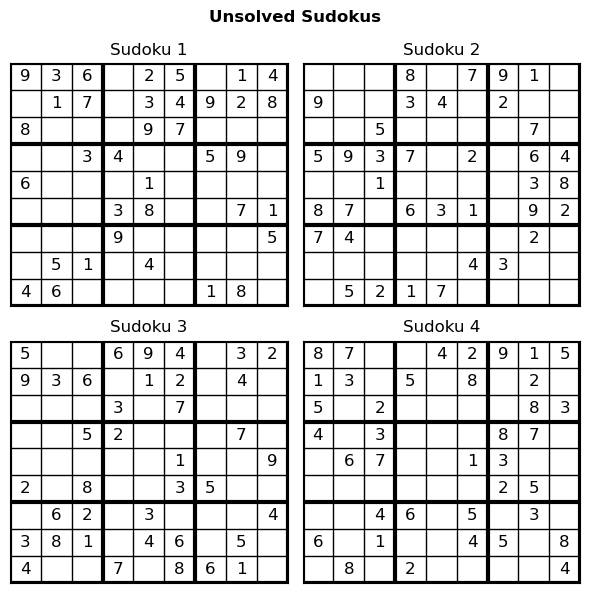

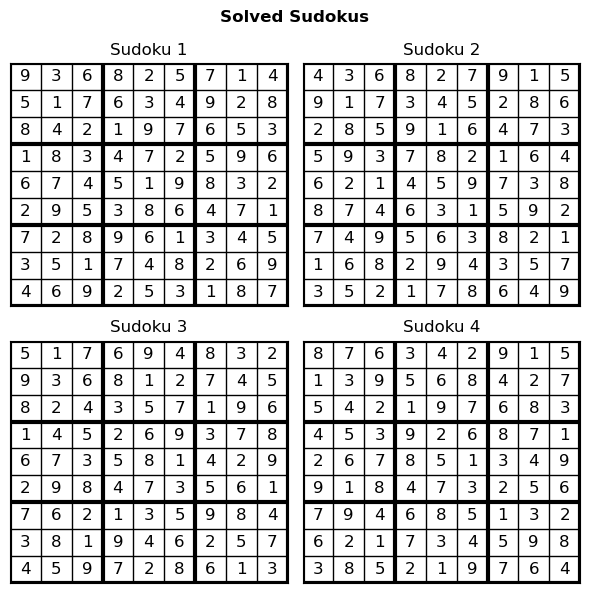

In [2]:
# Import required libraries
import matplotlib.pyplot as plt

# Function to solve sudoku based on backtracking algorithm
def solve_sudoku(board):
    def is_valid(row, col, num):
        # Check if the number is already in the current row
        if num in board[row]:
            return False
        
        # Check if the number is already in the current column
        if num in [board[i][col] for i in range(9)]:
            return False
        
        # Check if the number is already in the current 3x3 subgrid
        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(start_row, start_row + 3):
            for j in range(start_col, start_col + 3):
                if board[i][j] == num:
                    return False
        
        return True
    
    # Backtracking algorithm
    def backtrack():
        for row in range(9):
            for col in range(9):
                if board[row][col] is None:
                    for num in range(1, 10):
                        if is_valid(row, col, num):
                            board[row][col] = num
                            if backtrack():
                                return True
                            board[row][col] = None  # Backtrack
                    return False
        return True
    
    # Return
    if backtrack():
        return board
    else:
        return None


# Function to visualize a single sudoku using matplotlib
def visualize_sudoku(board, ax):
    # Draw the main lines of the grid
    for i in range(10):
        if i % 3 == 0:
            linewidth = 3  # Line thickness for 3x3 divisions
        else:
            linewidth = 1
        ax.axhline(i, linewidth=linewidth, color='black')
        ax.axvline(i, linewidth=linewidth, color='black')

    # Add numbers to the board
    for i in range(9):
        for j in range(9):
            if board[i][j] is not None:
                ax.text(j + 0.5, i + 0.5, str(board[i][j]), fontsize=12,
                        ha='center', va='center')

    # Set axis limits to show only Sudoku
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 9)
    
    # Remove axis ticks and invert y axis
    ax.set_xticks([])
    ax.set_yticks([])
    ax.invert_yaxis()
    
    
def visualize_multiple_sudokus(boards, status):
    # Determine the dimension of the Sudoku boards
    num_boards = len(boards)
    num_cols = 2
    num_rows = (num_boards + 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 3 * num_rows))

    # Iterate through each subplot and visualize the Sudoku board or turn off empty s
    for i, ax in enumerate(axes.flat):
        if i < num_boards: # If there's a Sudoku board to visualize
            visualize_sudoku(boards[i], ax)
            ax.set_title(f'Sudoku {i+1}')
        else: # If there's no Sudoku board to visualize
            ax.axis('off')  # Turn off empty subplot

    # Add a title and adjust the layout of the plot
    plt.suptitle(f'{status} Sudokus', fontweight='bold')
    plt.tight_layout()
    plt.show()
    

def main():
    # Define board with empty cells as None type
    board1 = [
        [9,3,6,None,2,5,None,1,4],
        [None,1,7,None,3,4,9,2,8],
        [8,None,None,None,9,7,None,None,None],
        [None,None,3,4,None,None,5,9,None],
        [6,None,None,None,1,None,None,None,None],
        [None,None,None,3,8,None,None,7,1],
        [None,None,None,9,None,None,None,None,5],
        [None,5,1,None,4,None,None,None,None],
        [4,6,None,None,None,None,1,8,None]
    ]
        
    # Define board with empty cells as None type
    board2 = [
        [None,None,None,8,None,7,9,1,None],
        [9,None,None,3,4,None,2,None,None],
        [None,None,5,None,None,None,None,7,None],
        [5,9,3,7,None,2,None,6,4],
        [None,None,1,None,None,None,None,3,8],
        [8,7,None,6,3,1,None,9,2],
        [7,4,None,None,None,None,None,2,None],
        [None,None,None,None,None,4,3,None,None],
        [None,5,2,1,7,None,None,None,None]
    ]
    
    # Define board with empty cells as None type
    board3 = [
        [5,None,None,6,9,4,None,3,2],
        [9,3,6,None,1,2,None,4,None],
        [None,None,None,3,None,7,None,None,None],
        [None,None,5,2,None,None,None,7,None],
        [None,None,None,None,None,1,None,None,9],
        [2,None,8,None,None,3,5,None,None],
        [None,6,2,None,3,None,None,None,4],
        [3,8,1,None,4,6,None,5,None],
        [4,None,None,7,None,8,6,1,None]
    ]
    
    # Define board with empty cells as None type
    board4 = [
        [8,7,None,None,4,2,9,1,5],
        [1,3,None,5,None,8,None,2,None],
        [5,None,2,None,None,None,None,8,3],
        [4,None,3,None,None,None,8,7,None],
        [None,6,7,None,None,1,3,None,None],
        [None,None,None,None,None,None,2,5,None],
        [None,None,4,6,None,5,None,3,None],
        [6,None,1,None,None,4,5,None,8],
        [None,8,None,2,None,None,None,None,4]
    ]
    
    # Make a list with all the unsolved boards
    boards = [board1, board2, board3, board4]
    
    # Visualize multiple unsolved Sudoku boards
    visualize_multiple_sudokus(boards, 'Unsolved')
    
    # Solve each Sudoku board
    for board in boards:
        solve_sudoku(board)

    # Visualize multiple solved sudokus
    visualize_multiple_sudokus(boards, 'Solved')
    
if __name__ == "__main__":
    main()